# Basic EDA(Exploratory Data Analysis)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from collections import Counter

- ### Load the CSV into a Pandas DataFrame.

In [4]:
data = 'quotes_data.csv' 
df = pd.read_csv(data) #reading the data
df.head() #printing the first 5 records


,Author,Quote,TagNames
0,Albert Einstein,The world as we have created it is a process o...,"change,deep-thoughts,thinking,world"
1,J.K. Rowling,"It is our choices, Harry, that show what we tr...","abilities,choices"
2,Albert Einstein,There are only two ways to live your life. One...,"inspirational,life,live,miracle,miracles"
3,Jane Austen,"The person, be it gentleman or lady, who has n...","aliteracy,books,classic,humor"
4,Marilyn Monroe,"Imperfection is beauty, madness is genius and ...","be-yourself,inspirational"


- ### Display basic statistics about the dataset (e.g., missing values, unique authors, number of tags, etc.).

In [6]:
df.info() #breif information of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Author    100 non-null    object
 1   Quote     100 non-null    object
 2   TagNames  97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [7]:
df.duplicated().sum() # checking for the duplicates

0

In [8]:
df.isnull().sum() # checking for the null values

Author      0
Quote       0
TagNames    3
dtype: int64

In [9]:
df['TagNames'] = df['TagNames'].fillna(df['TagNames'].mode()[0]) #filling the null values with mode of that column
df.isnull().sum()                          #finding sum of null values

Author      0
Quote       0
TagNames    0
dtype: int64

In [10]:
summary = df.describe() # summary of the dataset
summary

,Author,Quote,TagNames
count,100,100,100
unique,50,100,83
top,Albert Einstein,The world as we have created it is a process o...,love
freq,10,1,7


In [11]:
unique_author_count = df['Author'].nunique()          #count of unique authors
print('Number of Authors:',unique_author_count)
unique_author = df['Author'].unique()                 #unique authors in the dataset
print('\nUnique AuthorNames are :\n')  
i=0
for x in unique_author:                               #looping unique_author to get the unique Authors
    i+=1
    print(f'{i}. {x}')
 

Number of Authors: 50

Unique AuthorNames are :

1. Albert Einstein
2. J.K. Rowling
3. Jane Austen
4. Marilyn Monroe
5. André Gide
6. Thomas A. Edison
7. Eleanor Roosevelt
8. Steve Martin
9. Bob Marley
10. Dr. Seuss
11. Douglas Adams
12. Elie Wiesel
13. Friedrich Nietzsche
14. Mark Twain
15. Allen Saunders
16. Pablo Neruda
17. Ralph Waldo Emerson
18. Mother Teresa
19. Garrison Keillor
20. Jim Henson
21. Charles M. Schulz
22. William Nicholson
23. Jorge Luis Borges
24. George Eliot
25. George R.R. Martin
26. C.S. Lewis
27. Martin Luther King Jr.
28. James Baldwin
29. Haruki Murakami
30. Alexandre Dumas fils
31. Stephenie Meyer
32. Ernest Hemingway
33. Helen Keller
34. George Bernard Shaw
35. Charles Bukowski
36. Suzanne Collins
37. J.R.R. Tolkien
38. Alfred Tennyson
39. Terry Pratchett
40. J.D. Salinger
41. George Carlin
42. John Lennon
43. W.C. Fields
44. Ayn Rand
45. Jimi Hendrix
46. J.M. Barrie
47. E.E. Cummings
48. Khaled Hosseini
49. Harper Lee
50. Madeleine L'Engle


In [12]:
all_tags = []                           #creating a empty list
for tag in df['TagNames']:             #creating a loop to get the tags from the data set 
    all_tags.extend(tag.split(','))     #insert all the tags to the list by spliting tags 
unique_tags = set(all_tags)             # Convert the list of all tags to a set to find unique tags
unique_tag_count = len(unique_tags)     # Count of unique tags
print('Number of unique tags: ',unique_tag_count)  


Number of unique tags:  137


In [13]:
df.to_csv('cleaned_dataset.csv',index = False)           # Store the cleaned dataset in a csv file

In [14]:
df1  = pd.read_csv('cleaned_dataset')                # reading cleaned dataset
df1.info()                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Author    100 non-null    object
 1   Quote     100 non-null    object
 2   TagNames  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


# Data visualization

- ### Bar chart of the top 10 most quoted authors.

In [17]:
# Data Visualization
#Retriving the top 10 most quoted authors
group = df1['Author'].value_counts()  
top_ten = group.head(10)
top_ten = top_ten.sort_values()

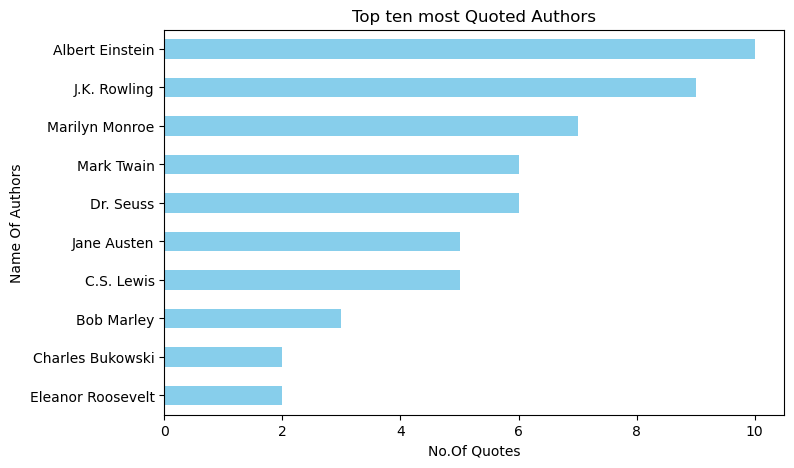

In [18]:
plt.figure(figsize = (8,5))                  #size of the chart
top_ten.plot(kind = 'barh',color = 'skyblue')  
plt.title('Top ten most Quoted Authors')       #Tittle of the bar chart
plt.xlabel('No.Of Quotes')                     #Name of x-axis
plt.ylabel('Name Of Authors')                  #Name of y-axis
plt.show()

#### Insights:
- The above chart is a horizontal bar chart representing the top ten most Quoted Authors
- As per the representation 'Albert Einstein' is the author who quoted the most compared to other authors
- 'j.k. Rowling' is second highest quoted author who quote the most after the Albert Einstein
- The Authors 'Charles Bukowski' and 'Eleanor Roosevelt' are one who had less Quotes when compared to other authors in the graph

- ### Word cloud of the most common words in the quotes.

In [21]:
#Word cloud of the most common words in the quotes.
# Define stop words (you can expand this list as needed)
stop_words = set(["the", "is", "in", "and", "you", "your", "to", "a", "of", "for", "on","it", "with", "as", "at", "all", "by", "i", "not",
                  "but", "be", "that", "if", "can", "s", "t", "she", "are", "who", "will", "what", "have"])
# Convert the 'Quote' column to a list of strings
Quotes = df1['Quote'].tolist()
# Join all quotes into one large string and convert to lowercase
all_words = " ".join(Quotes).lower()
# Extract words using regex to split on word boundaries
words = re.findall(r'\b\w+\b', all_words)
# Filter out stop words
filtered_words = [word for word in words if word not in stop_words]
# Count the frequency of each word
word_counts = Counter(filtered_words)
# retriving top 5 words most used in Quotes
top_5_words = word_counts.most_common(5)
#print(top_5_words)
# Print the top 5 most common words and their frequencies
print("Top 5 Most Common Words:")
for word, frequency in top_5_words:
    print(f"{word}: {frequency}")

NameError: name 'Counter' is not defined

In [ ]:
# Create a WordCloud with width,height and background color
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)   

# Plot the WordCloud
plt.figure(figsize=(10, 6))                           # figure size
plt.imshow(wordcloud, interpolation='bilinear')       #display word cloud image
plt.axis('off')                                       # Hide the axes
plt.title('Word Cloud of Most Common Words in Quotes') # title of the Word cloud
plt.show()

#### Insights:
- The above chart is a word cloud visualization representing the most common word in the quotes
- According to the word cloud it will display words with the highest frequency in larger font size
- As per the visualization 'love' is a word that contains highest frequency and having the large font size in the above chart
- 'one' is a word that contains the second highest frequency and the words that are having small font size will have the least frequency

- ### Pie chart showing the proportion of top 5 tags.

In [ ]:
#top five most used tags
tags = df1['TagNames'].str.split(',').explode() #spliting the TagNames and creating one row per tag
Tags_value_count = tags.value_counts()          #storing the count of each tag in a variable
top_five_tags = Tags_value_count.head(5)        #Retriving the top 5 most used tags
top_five_tags

In [ ]:
plt.figure(figsize = (5,5))              #size of the pie chart
plt.pie(x = top_five_tags,labels = top_five_tags.index,autopct = '%.2f%%')       
plt.title('Proportion of top 5 tags')     #Title of the chart
plt.show()

#### Insights:
- The above pie chart is representing the proportion of the top five tags
- 'love' tag is having the high percentage i.e 25.76% and the second highest is having two tags
 life tag and inspirational tag with 19.70%
- books tag is having the least proportion i.e 16.67% compared to all other tags

- ### Pie chart showing the proportion of top 5 Authors.

In [ ]:
# top five most Quoted authors
grouped = df1.groupby('Author')['Quote'].count()       #grouping the authors by counting the Quotes  
sort = grouped.sort_values(ascending = False)          #sort in desending order so highest will come first
top_five_authors = sort.head()                         #Retriveing the top five records
print(top_five_authors)                                    

In [ ]:
plt.figure(figsize = (5,5))                             #adding the chart size                              
plt.pie(x = top_five_authors,labels = top_five_authors.index,autopct = '%.2f%%')    
plt.title('Top five most quoted of Authors')             #Adding the title for pie chart 
plt.show()

#### Insights:
- The above pie chart representing the top five most quoted Authors
- 'Albert Einstein' is having the high percentage i.e 26.32% and the second highest author 'J.K. Rowling' with 23.68% of proportion
- The Authors 'Dr. Seuss' and 'Mark Twain' are having the least proportion i.e,15.79% compared to all other Authors